### Titanic 생존률_30303_김재홍

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbr
plt.style.use('seaborn')

In [2]:
df=pd.read_csv('./data/train.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_drop=df.drop(df.columns[7],axis=1)

In [9]:
df_drop.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df_drop=df_drop.drop(df_drop.columns[7],axis=1)

In [11]:
df_drop.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df_drop=df_drop.drop(df_drop.columns[8],axis=1)

In [13]:
df_drop.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Fare', 'Embarked'],
      dtype='object')

In [14]:
df_drop['Age'].mean()

29.69911764705882

In [15]:
df_drop['Age'].median()

28.0

In [16]:
df1=df_drop['Age'].fillna(df_drop['Age'].median(),inplace=True)

In [17]:
df_drop.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Fare           0
Embarked       2
dtype: int64

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <a list of 30 Patch objects>)

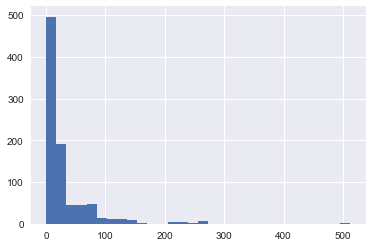

In [18]:
plt.hist(df_drop['Fare'],bins=30)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

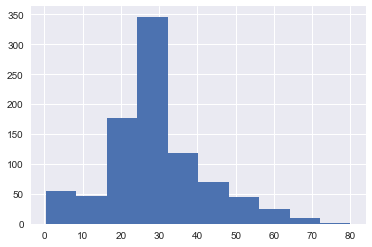

In [19]:
plt.hist(df_drop['Age'],bins=10)

In [20]:
df_drop.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.159651
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,1.000000


Text(0.5, 1, 'Heatmap')

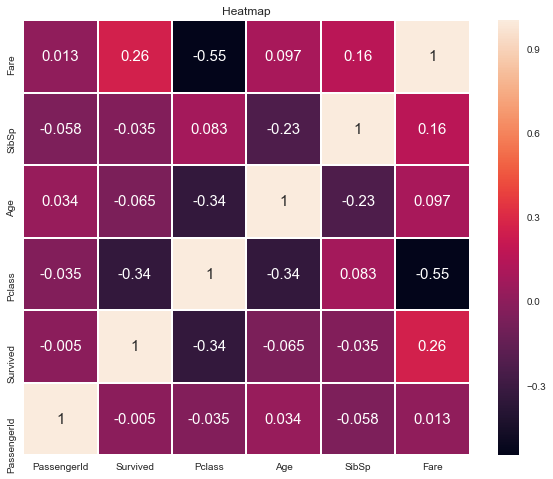

In [21]:
plt.figure(figsize=(10,8))
sbr.heatmap(df_drop.corr(),annot=True,annot_kws={'size':15},linecolor='white',linewidth=1)
plt.ylim(0,6)
plt.title('Heatmap')

In [22]:
test=pd.read_csv('./data/test.csv')

In [23]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
test['Age'].mean()

30.272590361445783

In [26]:
test['Age'].median()

27.0

In [27]:
test['Age'].fillna(test['Age'].median(),inplace=True)

In [28]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
test_drop=test.drop(test.columns[7],axis=1)

In [30]:
test_drop.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [31]:
test_drop=test.drop(test_drop.columns[8],axis=1)

In [32]:
test_drop=test.drop(test_drop.columns[7],axis=1)

In [33]:
test_drop.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1, 'Testmap')

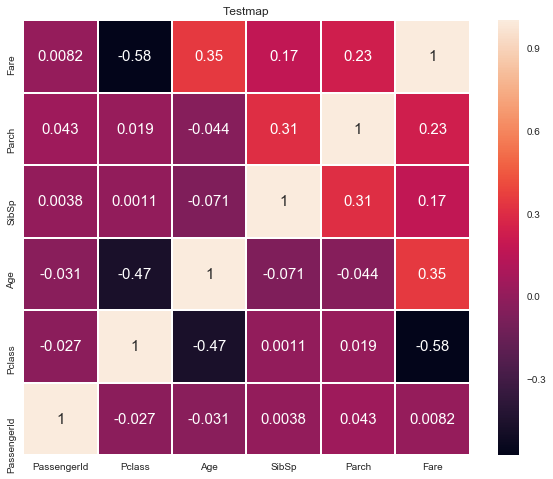

In [34]:
plt.figure(figsize=(10,8))
sbr.heatmap(test_drop.corr(),annot=True,annot_kws={'size':15},linecolor='white',linewidth=1)
plt.ylim(0,6)
plt.title('Testmap')